#**Time Series Model**

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [2]:
df=pd.read_csv("airline_passengers.csv")
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df['Month']=pd.to_datetime(df['Month'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
# Checking sequence
df.tail()

,Month,Thousands of Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [7]:
df.set_index("Month",inplace=True)

In [8]:
# Missing data analysis
df.isnull().sum()

Thousands of Passengers    0
dtype: int64

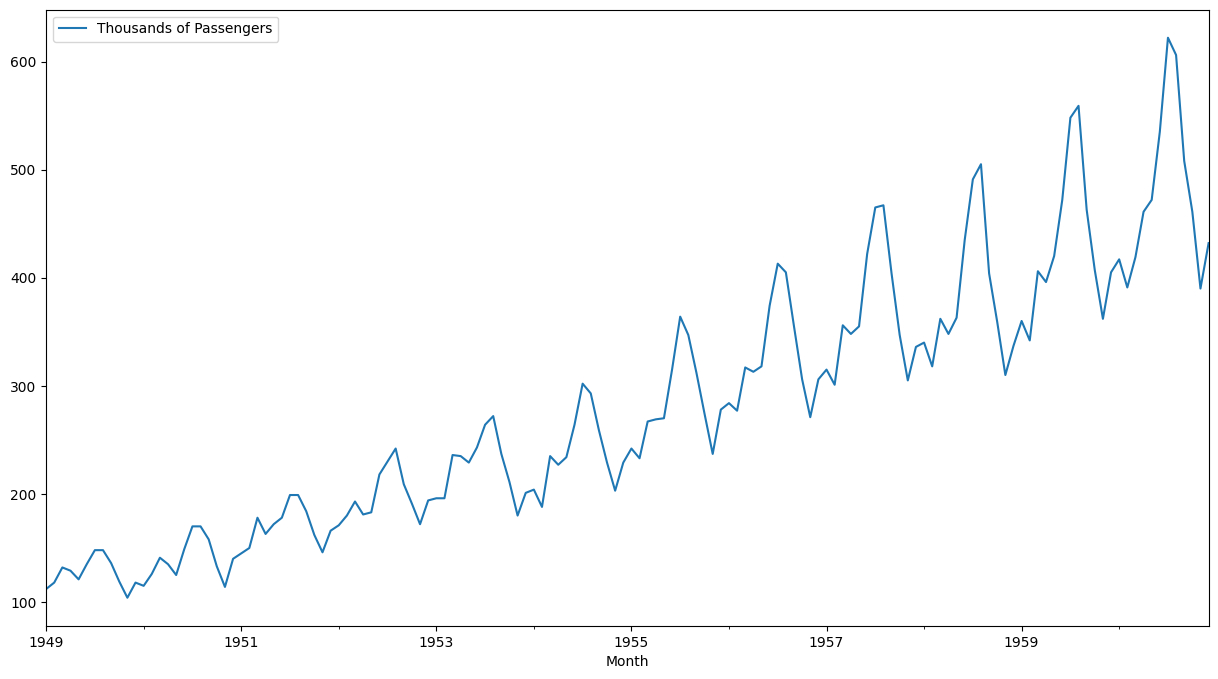

In [9]:
df.plot(figsize=(15,8))
plt.show()

In [10]:
# Decomposition

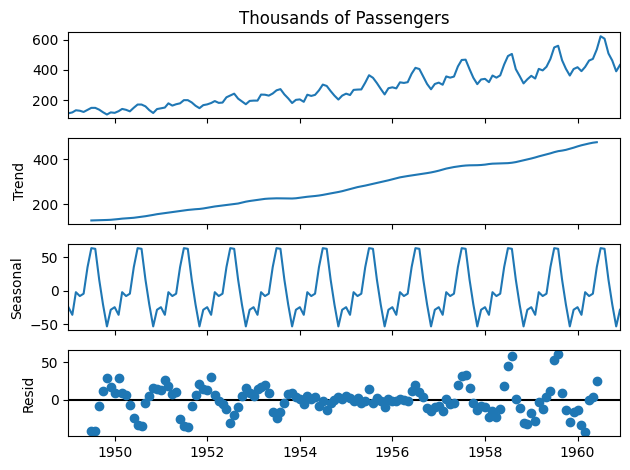

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_1 =seasonal_decompose(df["Thousands of Passengers"],model="additive",period=12)
decomposition_2 =seasonal_decompose(df["Thousands of Passengers"],model="multiplicative",period=12)
decomposition_1.plot()
plt.show()


**Homoscedasticity present  then model is additive **

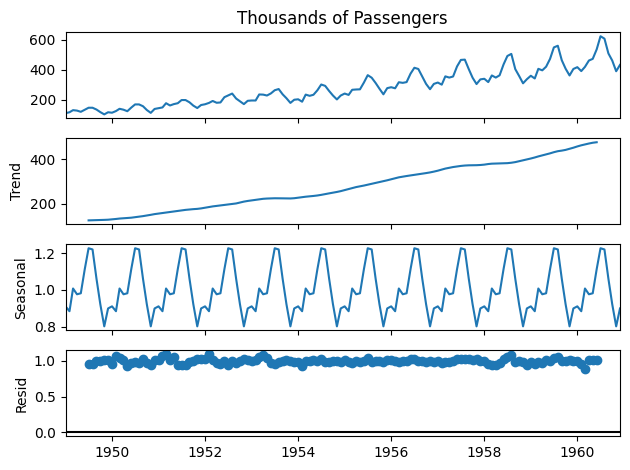

In [12]:
decomposition_2.plot()
plt.show()



**Homoscedasticity present**

**# Check durbin watson test for auto correlation**

In [13]:
sm.stats.durbin_watson(df["Thousands of Passengers"])

0.0121527966037621

# **Typical Time Series Forecasting Problem**

In [14]:
# as durbin watson test factor less than 2 then is typical time series forecasting problem

The Durbin Watson (DW) statistic is a test for autocorrelation in the residuals from a statistical model or regression analysis.
The Durbin-Watson statistic will always have a value ranging between 0 and 4.
A value of 2.0 indicates there is no autocorrelation detected in the sample.

### **The Durbin-Watson statisticlies in the range 0-4. A value of 2 or nearly 2 indicates that there is no first-order autocorrelation. An acceptable range is 1.50 - 2.50.**

# Checking for stationary
# ** dataset should be stationary**

In [15]:
# p<0.05 means accept alternate hypothesis

**# Method to check data is stationary or not "Agumented Dickey Fuller Test"**

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
adfuller(df["Thousands of Passengers"])

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [18]:
def adf_check(timeseries):
  result = adfuller(timeseries)
  print("Augmented Dickey Fuller Test-To check data is Stationary or Non-Stationary")
  labels=["ADF Stats test","p-value","#Lags","No of observations"]

  for i,j in zip(result,labels):
    print(j + " : "+str(i))

  if result[1] <=0.05:
    print("Strong Evidence against null hypothesis and my timeseries is stationary")
  else:
    print("Strong Evidence towards null hypothesis and my timeseries is not stationary")


In [19]:
adf_check(df["Thousands of Passengers"])

Augmented Dickey Fuller Test-To check data is Stationary or Non-Stationary
ADF Stats test : 0.8153688792060498
p-value : 0.991880243437641
#Lags : 13
No of observations : 130
Strong Evidence towards null hypothesis and my timeseries is not stationary


In [20]:
df["1st Diff"]=df["Thousands of Passengers"]-df["Thousands of Passengers"].shift(1)
df.head()

,Thousands of Passengers,1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [21]:
adf_check(df["1st Diff"].dropna())

Augmented Dickey Fuller Test-To check data is Stationary or Non-Stationary
ADF Stats test : -2.8292668241700047
p-value : 0.05421329028382478
#Lags : 12
No of observations : 130
Strong Evidence towards null hypothesis and my timeseries is not stationary


In [22]:
df['2nd Diff']=df["1st Diff"]-df["1st Diff"].shift(1)

In [23]:
adf_check(df["2nd Diff"].dropna())

Augmented Dickey Fuller Test-To check data is Stationary or Non-Stationary
ADF Stats test : -16.384231542468513
p-value : 2.7328918500142026e-29
#Lags : 11
No of observations : 130
Strong Evidence against null hypothesis and my timeseries is stationary


## **Comparison for 12 Months**

In [24]:
df['Seasonality']=df["Thousands of Passengers"]-df['Thousands of Passengers'].shift(12)

In [25]:
df.head()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [26]:
adf_check(df["Seasonality"].dropna())

Augmented Dickey Fuller Test-To check data is Stationary or Non-Stationary
ADF Stats test : -3.383020726492481
p-value : 0.011551493085514952
#Lags : 1
No of observations : 130
Strong Evidence against null hypothesis and my timeseries is stationary


# **My Timeseries Trend and Seasonality are stationary that is most import for our analysis**

In [27]:
# Trend: d=2
# Sesonality: D=1


In [28]:
# # PARAMRTERS :
# h=pdq
# # p=partial autocorrelation or autoregression method
# # d=difference(lag function)or integrated method
# # q=autocorrelation or moving avg method

# Trend
# # p=?
# # d=2
# q=?

# # seasonality
# # p=?
# # D=1
# # Q=?




# **Finding P and Q**

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
# proof _partial autocoorelation function and acf-autocorrelation function


In [30]:
# Trend Data

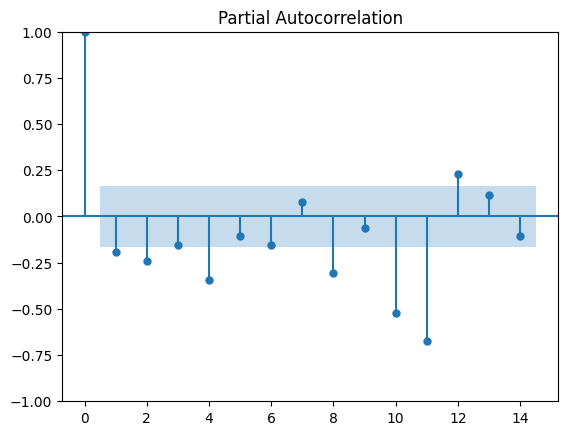

In [31]:
plot_pacf(df['2nd Diff'].dropna(),lags=14)
plt.show()

In [38]:
# Trend
# p=4
# d=2
# q=2
# Seanonality
# P=2
# D=1
# Q=5

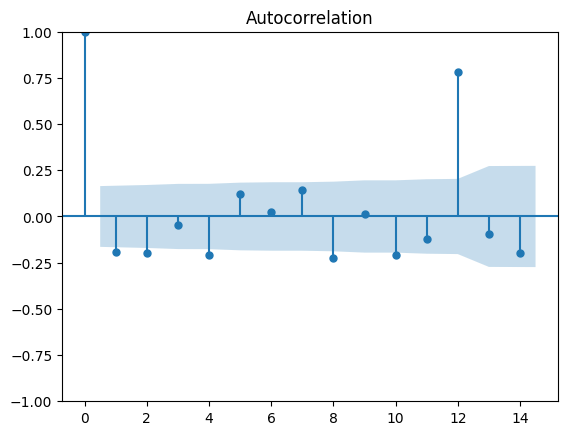

In [34]:
plot_acf(df['2nd Diff'].dropna(),lags=14)
plt.show()

In [35]:
# Seasonality

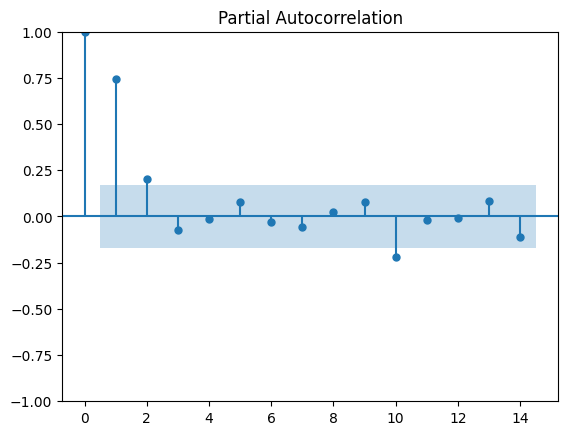

In [36]:
plot_pacf(df['Seasonality'].dropna(),lags=14)
plt.show()

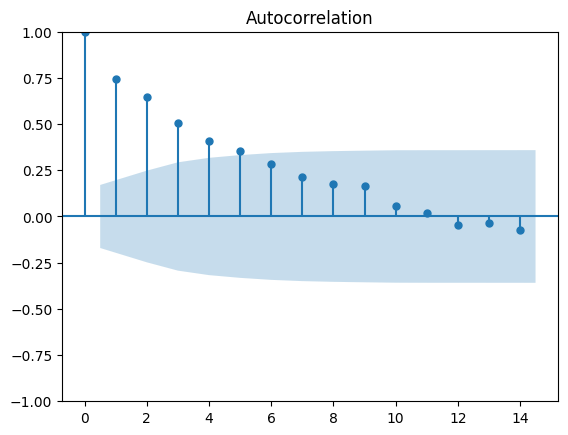

In [37]:
plot_acf(df['Seasonality'].dropna(),lags=14)
plt.show()

In [39]:
# Trend
# p=4
# d=2
# q=2
# Seanonality
# P=2
# D=1
# Q=5

In [40]:
# ARIMA MODEL

In [41]:
# Build Time Series Forecasting Model

In [42]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


In [47]:
model=sm.tsa.statespace.SARIMAX(df["Thousands of Passengers"],order=(4,2,2),seasonal_order=(2,1,1,12))
# order=Trend
# Seaonal_order-Seasonality

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [48]:
result=model.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:              Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -497.785
Date:                              Fri, 29 Sep 2023   AIC                           1015.569
Time:                                      16:11:48   BIC                           1044.245
Sample:                                  01-01-1949   HQIC                          1027.221
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3590      0.097    -14.045      0.000      -1.549      -1.169
ar.L2         -0.49

In [55]:
# SARIMAX(4, 2, 2)x(2, 1, 5, 12) : AIC - 1021.460
# SARIMAX(4, 2, 2)x(2, 1, 4, 12) : AIC - 1020.041
# SARIMAX(4, 2, 2)x(2, 1, 3, 12) : AIC - 1018.523
# SARIMAX(4, 2, 2)x(2, 1, 2, 12) : AIC - 1017.565
# SARIMAX(4, 2, 2)x(2, 1, 1, 12) : AIC - 1015.567 # this is the best basis manual approach

In [50]:
import itertools

p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
# Trend
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

print("Few parameters combinations are:")
print('{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('{} x {}'.format(pdq[2],seasonal_pdq[2]))

Few parameters combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [56]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(dataset['Thousands of Passengers'], order=param,
                                 seasonal_order=param_seasonal, enforce_stationarity=False,
                                             enforce_invertibility=False)
            result = model.fit()
            print("ARIMA{}x{} - AIC:{}".format(param, param_seasonal, result.aic))
        except:
            continue


In [58]:
model = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'], order=(0,1,1),
                                 seasonal_order=(1,1,1, 12), enforce_stationarity=False,
                                  enforce_invertibility=False)
#  order - Trend
# seasonal_order - Seasonality
result = model.fit()
print(result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:            Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.160
Date:                            Fri, 29 Sep 2023   AIC                            920.319
Time:                                    17:21:37   BIC                            931.368
Sample:                                01-01-1949   HQIC                           924.805
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3351      0.076     -4.403      0.000      -0.484      -0.186
ar.S.L12      -0.5597      0.285   

In [59]:
len(df)
# train =  till 130
# test = 130-144


144

In [60]:
# Training with given dataset
df['Forecast'] = result.predict(start=130, end=144, dynamic=True)
df

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0,602.524062
1960-09-01,508,-98.0,-82.0,45.0,503.586111
1960-10-01,461,-47.0,51.0,54.0,450.122021


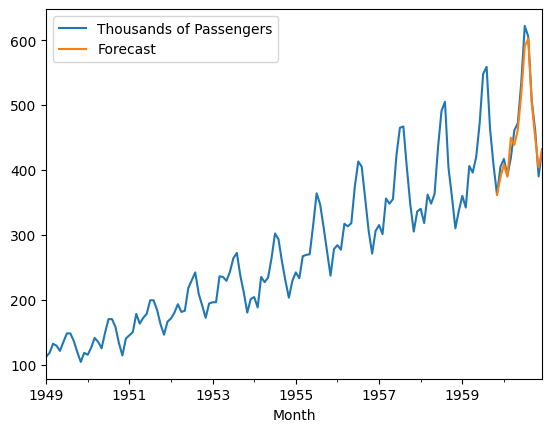

In [61]:
df[['Thousands of Passengers', 'Forecast']].plot()
plt.show()

## Predict the forecasting value for 5 years

In [62]:
from pandas.tseries.offsets import DateOffset

In [63]:
df.tail()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,602.524062
1960-09-01,508,-98.0,-82.0,45.0,503.586111
1960-10-01,461,-47.0,51.0,54.0,450.122021
1960-11-01,390,-71.0,-24.0,28.0,403.741478
1960-12-01,432,42.0,113.0,27.0,431.021242


In [64]:
future_date = [df.index[-1] + DateOffset(months=x) for x in range(0,61)]

In [65]:
df.index[-1]

Timestamp('1960-12-01 00:00:00')

In [66]:
future_date

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [67]:
future_date_df = pd.DataFrame(index=future_date[1:], columns=df.columns)

In [68]:
future_date_df

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN,NaN


In [69]:
final_forecasting_dataset = pd.concat([df, future_date_df])

In [70]:
final_forecasting_dataset

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN


In [71]:
final_forecasting_dataset['Forecast'] = result.predict(start=144, end=204, dynamic=True)

In [72]:
final_forecasting_dataset

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1965-08-01,NaN,NaN,NaN,NaN,786.270917
1965-09-01,NaN,NaN,NaN,NaN,689.286629
1965-10-01,NaN,NaN,NaN,NaN,640.662259
1965-11-01,NaN,NaN,NaN,NaN,572.550648


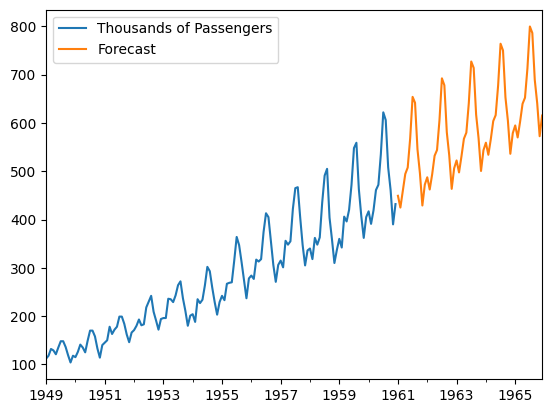

In [73]:
final_forecasting_dataset[['Thousands of Passengers','Forecast']].plot()
plt.show()

In [74]:
final_forecasting_dataset.to_csv("final_forecasting_dataset.csv")